In [202]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import  train_test_split
import pandas as pd
import numpy as np
import tensorflow
import matplotlib.pyplot as plt

In [203]:
# Load the iris dataset
data1 = load_iris()

# Create a DataFrame with features
data = pd.DataFrame(data1.data, columns=data1.feature_names)

# Add the target (species) as a new column
data['target'] = data1.target

# (Optional) Add target names as labels for readability
data['species'] = data['target'].apply(lambda x: data1.target_names[x])

In [204]:

del data['target']

In [205]:
encoder=LabelEncoder()

In [206]:
data['species']=encoder.fit_transform(data['species'])

In [237]:
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [208]:
import joblib 
joblib.dump(encoder,"encoder.pkl")

['encoder.pkl']

In [238]:
x1=data.iloc[:,:-1]
y=data.iloc[:,-1:]

In [239]:
scaler=StandardScaler()
x=scaler.fit_transform(x1.values)

In [240]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [211]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,random_state=40)

In [176]:
xtrain.shape,ytrain.shape

((120, 4), (120, 1))

In [212]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,PReLU,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [213]:
model=Sequential()
model.add(Dense(units=6,input_shape=(4,)))
model.add(Dropout(0.3))
model.add(PReLU())
model.add(Dense(units=32))
model.add(PReLU())
model.add(Dense(units=3,activation='softmax'))

c:\Users\Avijit\anaconda3\envs\DL\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [214]:
optim=tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [215]:
model.compile(optimizer=optim,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [216]:
stop=EarlyStopping(
    patience=10,
    verbose=1,
    restore_best_weights=True,
    monitor='val_loss'
)

In [217]:
model_history=model.fit(xtrain,ytrain,epochs=1000,batch_size=10,validation_split=0.20,callbacks=stop)

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3130 - loss: 1.1305 - val_accuracy: 0.4583 - val_loss: 1.0858
Epoch 2/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4025 - loss: 1.0817 - val_accuracy: 0.4167 - val_loss: 1.0509
Epoch 3/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5839 - loss: 1.0293 - val_accuracy: 0.5833 - val_loss: 1.0126
Epoch 4/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7394 - loss: 0.9668 - val_accuracy: 0.5833 - val_loss: 0.9690
Epoch 5/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7450 - loss: 0.9538 - val_accuracy: 0.5833 - val_loss: 0.9282
Epoch 6/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7030 - loss: 0.8954 - val_accuracy: 0.5833 - val_loss: 0.8833
Epoch 7/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7056 - loss: 0.8526 - val_accuracy: 0.5833 - val_loss: 0.8395
Epoch 8/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6961 - loss: 0.7996 - val_accu

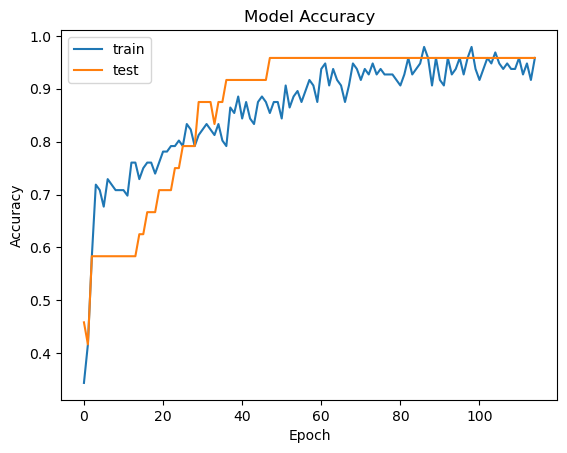

In [218]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()

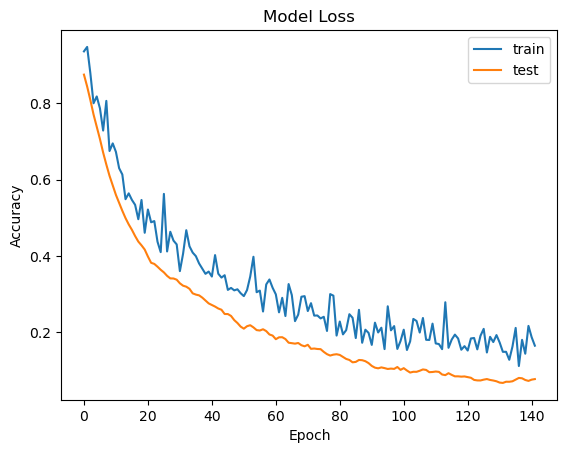

In [129]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()

In [219]:
import numpy as np
y_pred_probs = model.predict(xtest)
y_pred = np.argmax(y_pred_probs, axis=1)  # for softmax output


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


In [220]:
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix

In [221]:
print(accuracy_score(ytest,y_pred)*100)
print(precision_score(ytest,y_pred,average='weighted')*100)
print(recall_score(ytest,y_pred,average='weighted')*100)
print(f1_score(ytest,y_pred,average='weighted')*100)

100.0
100.0
100.0
100.0


In [222]:
confusion_matrix(ytest,y_pred)

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 10]])

TESTING

In [223]:
sl=6.7
sw=3.0
pl=5.2
pw=2.3

In [262]:
input = np.array([[sl,sw,pl,pw]])


In [244]:
sc=joblib.load('scaler.pkl')

In [263]:
input_scaled = sc.transform(input)
input_scaled

array([[ 1.03800476, -0.13197948,  0.8195957 ,  1.44883158]])

In [264]:
output_prob=model.predict(input_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [265]:
output=np.argmax(output_prob,axis=1)

In [267]:
print("PREDICTED FLOWER :",encoder.inverse_transform(output)[0])

PREDICTED FLOWER : virginica
